# Other joins

The `merge()` method in pandas allows not only inner and left joins but also supports two additional types of joins: **right joins** and **outer joins**.

A right join works as the counterpart of a left join. It keeps all rows from the right table and includes only the matching rows from the left table. Where no match exists, the left table’s columns will display missing values in the result.

When performing a right join, sometimes the key column used to connect the two tables may have different names. In such cases, the `left_on` and `right_on` arguments of the `merge()` method allow us to specify which columns from each table should be matched. This ensures flexibility in handling tables with inconsistent naming conventions while still merging correctly.

The last type of join is the outer join. An outer join returns all rows from both tables, regardless of whether a match is present. If there is no corresponding value between the two tables, the unmatched columns are filled with null values.

In practice, an outer join is particularly useful when combining datasets where complete overlap between key columns cannot be guaranteed. By including all rows from both tables, it provides a more comprehensive view, though it often results in some missing values in the merged output.

## Prepare Data

In [10]:
# Import pandas library
import pandas as pd

# Read the file
movies = pd.read_pickle("datasets/movies.p")
movies_genres = pd.read_pickle("datasets/movie_to_genres.p")
action_movies = movies_genres[movies_genres["genre"] == "Action"]
scifi_movies = movies_genres[movies_genres["genre"] == "Science Fiction"]

pop_movies = pd.read_csv("datasets/pop_movies.csv")

iron_1_actors = pd.read_csv("datasets/iron_1_actors.csv")
iron_2_actors = pd.read_csv("datasets/iron_2_actors.csv")

## Exercise: Right join to find unique movies

You have two datasets: `action_movies` and `scifi_movies`. Since many science fiction films are also categorized as action movies, your goal is to find the movies that belong *only* to the sci-fi genre. To achieve this, you’ll perform a right join and then merge the result with the main `movies` table to get their details.

### Instructions

1. Merge the `action_movies` and `scifi_movies` tables using a **right join** on the column `movie_id`.
2. Add suffixes `'_act'` and `'_sci'` to differentiate columns from the two tables.
3. From the merged table, filter only the rows where `genre_act` is **null** — these represent sci-fi-only movies.
4. Merge this filtered table with the `movies` table using an **inner join**, matching `id` from `movies` with `movie_id` from the sci-fi-only dataset.
5. Display the first few rows and the shape of the final table.

In [7]:
# Step 1: Merge action_movies and scifi_movies with a right join
action_scifi = action_movies.merge(
    scifi_movies,
    on='movie_id',
    how='right',
    suffixes=('_act', '_sci')
)

# Step 2: Filter rows where genre_act is null (sci-fi only)
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]

# Step 3: Merge the sci-fi-only movies with the main movies table
sci_fi_movies = movies.merge(
    scifi_only,
    left_on='id',
    right_on='movie_id',
    how='inner'
)

# Step 4: View results
print(sci_fi_movies.head())
print(sci_fi_movies.shape)

      id                         title  popularity release_date  movie_id  \
0  18841  The Lost Skeleton of Cadavra    1.680525   2001-09-12     18841   
1  26672     The Thief and the Cobbler    2.439184   1993-09-23     26672   
2  15301      Twilight Zone: The Movie   12.902975   1983-06-24     15301   
3   8452                   The 6th Day   18.447479   2000-11-17      8452   
4   1649    Bill & Ted's Bogus Journey   11.349664   1991-07-19      1649   

  genre_act        genre_sci  
0       NaN  Science Fiction  
1       NaN  Science Fiction  
2       NaN  Science Fiction  
3       NaN  Science Fiction  
4       NaN  Science Fiction  
(258, 7)


## Exercise: Popular genres with right join

You are given two datasets — one named `pop_movies`, containing the **top 10 most popular movies**, and another called `movies_genres`, which lists each movie’s genres.

Your task is to find out which genres appear most often among the most popular movies. To make sure no popular movie is missed, you will perform a **right join** between these two tables. Note that the joining columns have different names: `id` in `pop_movies` and `movie_id` in `movies_genres`.

Once merged, you’ll count how many movies belong to each genre and display the result using a bar chart.

### Instructions

1. Merge `movies_genres` and `pop_movies` using a **right join**, matching `movie_id` from the first table with `id` from the second.
2. Save the merged table as `genre_popular`.
3. Group the data by `genre` and count the number of movies for each.
4. Display the results in a **bar chart** to visualize genre popularity.

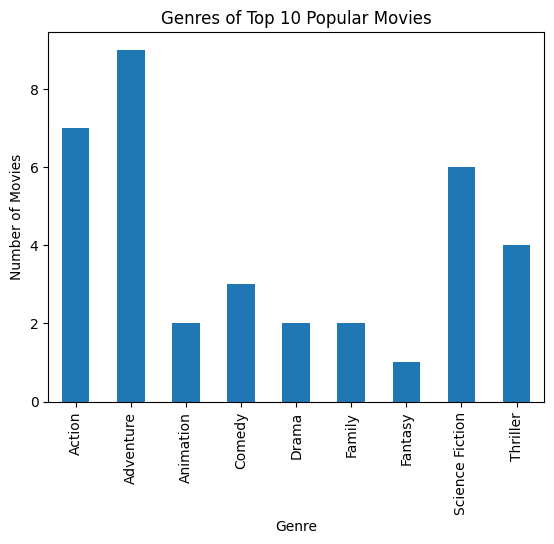

In [9]:
import matplotlib.pyplot as plt

# Step 1: Merge the two tables using a right join
genre_popular = movies_genres.merge(
    pop_movies,
    how='right',
    left_on='movie_id',
    right_on='id'
)

# Step 2: Count the number of movies in each genre
genre_summary = genre_popular.groupby('genre')['id'].count()

# Step 3: Display the genre counts as a bar chart
genre_summary.plot(kind='bar')
plt.title('Genres of Top 10 Popular Movies')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

## Exercise: Using outer join to select actors

An **outer join** is a great way to find items that don’t appear in both datasets. It includes **all records** from both tables and fills in **missing values** with nulls when a match is not found.

In this task, you’ll work with two datasets:

* `iron_1_actors` → actors from *Iron Man 1*
* `iron_2_actors` → actors from *Iron Man 2*

Many actors appeared in both movies, but your goal is to identify those who acted in **only one** of them.

### Instructions

1. Merge the `iron_1_actors` and `iron_2_actors` tables using an **outer join** on the `id` column.
2. Use suffixes `('_1', '_2')` to distinguish actor names from each movie.
3. Create a condition to identify rows where `name_1` or `name_2` is missing — these represent actors who appeared in **only one movie**.
4. Display those specific rows.

In [11]:
# Step 1: Merge both actor tables using an outer join
iron_1_and_2 = iron_1_actors.merge(
    iron_2_actors,
    on='id',
    how='outer',
    suffixes=('_1', '_2')
)

# Step 2: Identify actors who acted in only one movie
unique_actors = (iron_1_and_2['name_1'].isnull()) | (iron_1_and_2['name_2'].isnull())

# Step 3: Display the unique actors
print(iron_1_and_2[unique_actors].head())

                   character_1    id        name_1  \
0  Obadiah Stane / Iron Monger  1229  Jeff Bridges   
1                          NaN  1245           NaN   
2                          NaN  1896           NaN   
4                          NaN  2295           NaN   
7                          NaN  6807           NaN   

                                        character_2              name_2  
0                                               NaN                 NaN  
1  Natalie Rushman / Natasha Romanoff / Black Widow  Scarlett Johansson  
2      Lt. Col. James "Rhodey" Rhodes / War Machine         Don Cheadle  
4                             Ivan Vanko / Whiplash       Mickey Rourke  
7                                     Justin Hammer        Sam Rockwell  
